In [1]:
import sys


print(pd)
#pd.set_option("display.notebook_repr_html", False)
pd.set_option("display.notebook_repr_html", True)
my_path = r"C:\LOCAL_REPO\py_ExergyUtilities\ExergyUtilities"
sys.path.insert(0,my_path)
import util_pandas as util_pd

<module 'pandas' from 'C:\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>
*** Configuration info from Laptop ***
C:\LOCAL_REPO\py_ExergyUtilities\LoggingConfig\loggingNofile.conf


In [2]:
np.random.seed(123)
x = pd.DataFrame({
    'A': np.round(np.random.uniform(0,1,5),2),
    'B': np.random.choice([True,False],5,[0.4,0.5]),
    'C': ['f',None,"f","m",'m']}
    )
x

,A,B,C
0,0.70,False,f
1,0.29,False,None
2,0.23,True,f
3,0.55,False,m
4,0.72,True,m


In [3]:
p = [
    ("a", np.r_[1,2,3]),
    ("b", [True,False,True] ),
    ("c", ['aaa',2,2]),
]
pd.DataFrame.from_items(p)

,a,b,c
0,1,True,aaa
1,2,False,2
2,3,True,2


In [4]:
birth_dates = pd.read_csv("http://www.gagolewski.com/resources/data/birth_dates.csv", comment="#").head()
birth_dates
#bday

,Name,BirthDate
0,Hung Hyun-Seok,12.06.2000
1,Benno Blumenthal,31.12.1918
2,Paitoon Ornwimol,26.06.1958
3,P'yon Yong-Sun,10.07.1947
4,Étienne Chaney,04.09.1983


In [5]:
np.sum(birth_dates.Name)

"Hung Hyun-SeokBenno BlumenthalPaitoon OrnwimolP'yon Yong-SunÉtienne Chaney"

In [6]:
x

,A,B,C
0,0.70,False,f
1,0.29,False,None
2,0.23,True,f
3,0.55,False,m
4,0.72,True,m


In [7]:
x.shape

(5, 3)

In [8]:
x.head(2)

,A,B,C
0,0.70,False,f
1,0.29,False,None


In [9]:
x.describe()

,A
count,5.000000
mean,0.498000
std,0.227969
min,0.230000
25%,0.290000
50%,0.550000
75%,0.700000
max,0.720000


In [10]:
x.dtypes

A    float64
B       bool
C     object
dtype: object

In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
A    5 non-null float64
B    5 non-null bool
C    4 non-null object
dtypes: bool(1), float64(1), object(1)
memory usage: 165.0+ bytes


In [12]:
x["A"]

0    0.70
1    0.29
2    0.23
3    0.55
4    0.72
Name: A, dtype: float64

In [13]:
pd.DataFrame(x["A"])

,A
0,0.70
1,0.29
2,0.23
3,0.55
4,0.72


In [14]:
x.get("A")

0    0.70
1    0.29
2    0.23
3    0.55
4    0.72
Name: A, dtype: float64

#### PREFERED WAY: LOC

In [15]:
x.loc[:,"A"]

0    0.70
1    0.29
2    0.23
3    0.55
4    0.72
Name: A, dtype: float64

In [16]:
# DON'T USE THIS
x.A

0    0.70
1    0.29
2    0.23
3    0.55
4    0.72
Name: A, dtype: float64

In [17]:
u = pd.Series(np.r_[0:1:4j])
u.name = "Mine"
u

0    0.000000
1    0.333333
2    0.666667
3    1.000000
Name: Mine, dtype: float64

In [18]:
pd.DataFrame(u)

,Mine
0,0.000000
1,0.333333
2,0.666667
3,1.000000


In [19]:
pd.Series([1,2,3,4])

0    1
1    2
2    3
3    4
dtype: int64

In [20]:
pd.Series(['gg','gg','sadf','sdaf'])

0      gg
1      gg
2    sadf
3    sdaf
dtype: object

In [21]:
pd.Series([1., [35,66],dict(a=4)])

0           1
1    [35, 66]
2    {'a': 4}
dtype: object

In [22]:
arr = x.A.values
type(arr)


numpy.ndarray

In [23]:
np.sum(x.A)

2.4900000000000002

In [24]:
pd.Series(pd.date_range("2018-02-27",periods=3,freq="D"))

pd.Series(pd.date_range("2018-02-27",periods=3,freq="3M"))

0   2018-02-28
1   2018-05-31
2   2018-08-31
dtype: datetime64[ns]

In [25]:
birth_dates.describe()
birth_dates

,Name,BirthDate
0,Hung Hyun-Seok,12.06.2000
1,Benno Blumenthal,31.12.1918
2,Paitoon Ornwimol,26.06.1958
3,P'yon Yong-Sun,10.07.1947
4,Étienne Chaney,04.09.1983


In [26]:
birth_dates["BirthDate"] = pd.to_datetime(birth_dates["BirthDate"], dayfirst = True)
birth_dates

,Name,BirthDate
0,Hung Hyun-Seok,2000-06-12
1,Benno Blumenthal,1918-12-31
2,Paitoon Ornwimol,1958-06-26
3,P'yon Yong-Sun,1947-07-10
4,Étienne Chaney,1983-09-04


In [27]:
birth_dates.dtypes

Name                 object
BirthDate    datetime64[ns]
dtype: object

In [28]:
birth_dates['BirthDate']>= pd.to_datetime("1970")

0     True
1    False
2    False
3    False
4     True
Name: BirthDate, dtype: bool

In [29]:
x["C"] = pd.Series(x.C, dtype='category')
x.C

0      f
1    NaN
2      f
3      m
4      m
Name: C, dtype: category
Categories (2, object): [f, m]

In [30]:
x.C.cat.categories

Index(['f', 'm'], dtype='object')

In [31]:
x.C.cat.codes

0    0
1   -1
2    0
3    1
4    1
dtype: int8

In [32]:
u = pd.Series(pd.Categorical(
    ['l','l','m','s'],
    categories = ['s','m','l'],
    ordered = True,
    )       ,
    
             )

u

0    l
1    l
2    m
3    s
dtype: category
Categories (3, object): [s < m < l]

In [33]:
pd.cut(x.A, np.r_[0.,.5,1.])

0    (0.5, 1.0]
1    (0.0, 0.5]
2    (0.0, 0.5]
3    (0.5, 1.0]
4    (0.5, 1.0]
Name: A, dtype: category
Categories (2, interval[float64]): [(0.0, 0.5] < (0.5, 1.0]]

In [34]:
new = pd.cut(x.A, np.r_[0.,.5, 3/4,1.], labels = ["small","med","large"])
new

0      med
1    small
2    small
3      med
4      med
Name: A, dtype: category
Categories (3, object): [small < med < large]

In [35]:
tips = pd.read_csv("http://gagolewski.com/resources/data/tips.csv", comment="#")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [37]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [38]:
tips['sex'] = tips.sex.astype('category')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 11.8+ KB


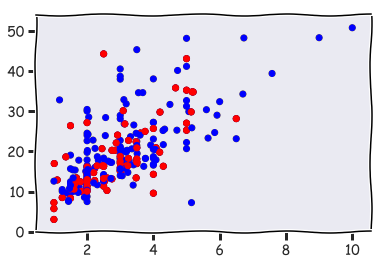

In [39]:
plt.xkcd()
plt.scatter(tips.tip, tips.total_bill, c=tips.sex.cat.codes,cmap='viridis')
plt.scatter(tips.tip, tips.total_bill, c=tips.sex.cat.codes,cmap='viridis')
plt.scatter(tips.tip, tips.total_bill, c=np.array(["red","blue"])[tips.sex.cat.codes])
plt.show()

## Index

In [40]:
x

,A,B,C
0,0.70,False,f
1,0.29,False,NaN
2,0.23,True,f
3,0.55,False,m
4,0.72,True,m


In [41]:
x.index

RangeIndex(start=0, stop=5, step=1)

In [42]:
x.columns

Index(['A', 'B', 'C'], dtype='object')

In [43]:
x.A

0    0.70
1    0.29
2    0.23
3    0.55
4    0.72
Name: A, dtype: float64

In [44]:
x.index = pd.Index(['Mary','Mark','John','Radko','Raul'])

In [45]:
x

,A,B,C
Mary,0.70,False,f
Mark,0.29,False,NaN
John,0.23,True,f
Radko,0.55,False,m
Raul,0.72,True,m


In [46]:
x.set_axis
x.set_index(np.r_[1,2,3,4,5])

,A,B,C
1,0.70,False,f
2,0.29,False,NaN
3,0.23,True,f
4,0.55,False,m
5,0.72,True,m


In [47]:
x.reset_index()
x

,A,B,C
Mary,0.70,False,f
Mark,0.29,False,NaN
John,0.23,True,f
Radko,0.55,False,m
Raul,0.72,True,m


In [48]:
x.index.name = "ROWS"
x.columns.name = "COLS"
x

COLS,A,B,C
ROWS,,,
Mary,0.70,False,f
Mark,0.29,False,NaN
John,0.23,True,f
Radko,0.55,False,m
Raul,0.72,True,m


## Heirarchy

In [49]:
np.random.seed(123)
y = pd.DataFrame({
    "A":np.round(np.random.uniform(0,1,6),2)
})
y

,A
0,0.70
1,0.29
2,0.23
3,0.55
4,0.72
5,0.42


In [50]:

np.random.seed(123)
y = pd.DataFrame({"A": np.round(np.random.uniform(0,1,6),2)})
y
y.index = pd.MultiIndex(
   names = ["top", "bottom"],
   levels = [ ["x", "y", "z"], [1,2,3,4] ],
   labels = [
       [0,0,0,1,1,2],
       [0,1,3,0,1,2]
   ]
)
y

A
top bottom      
x   1       0.70
    2       0.29
    4       0.23
y   1       0.55
    2       0.72
z   3       0.42

In [51]:
tips.groupby(['sex','day',]).mean()

total_bill       tip      size
sex    day                                 
Female Fri    14.145556  2.781111  2.111111
       Sat    19.680357  2.801786  2.250000
       Sun    19.872222  3.367222  2.944444
       Thur   16.715312  2.575625  2.468750
Male   Fri    19.857000  2.693000  2.100000
       Sat    20.802542  3.083898  2.644068
       Sun    21.887241  3.220345  2.810345
       Thur   18.714667  2.980333  2.433333

In [52]:
flights = pd.read_csv("http://gagolewski.com/resources/data/flights.csv", comment="#");
flights.head(14);

In [53]:
flights.describe();

In [54]:
#flights.set_index(['year','month']);

In [55]:
new = flights["month"] + " " + flights["year"].map(str)
flights['date'] = pd.to_datetime(new)

In [56]:
flights.head()

,year,month,passengers,date
0,1949,January,112,1949-01-01
1,1949,February,118,1949-02-01
2,1949,March,132,1949-03-01
3,1949,April,129,1949-04-01
4,1949,May,121,1949-05-01


In [57]:
flights2 = flights.set_index('date')
flights2.head()


,year,month,passengers
date,,,
1949-01-01,1949,January,112
1949-02-01,1949,February,118
1949-03-01,1949,March,132
1949-04-01,1949,April,129
1949-05-01,1949,May,121


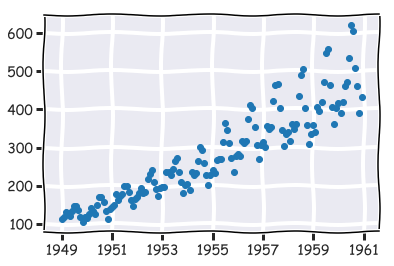

In [58]:
plt.scatter(flights2.index,flights['passengers']);
plt.grid(True, lw=0.5, zorder=0)

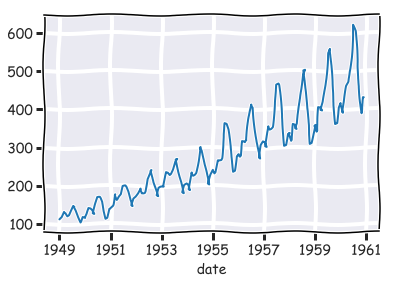

In [59]:
ax = flights2.passengers.plot();
ax.xaxis.grid(linewidth=.5)
ax.yaxis.grid(linewidth=.5)

In [60]:
# b.iloc[] is POSITIONAL
# b.loc[] is LABEL BASED

In [61]:
#birth_dates

,Name,BirthDate
0,Hung Hyun-Seok,2000-06-12
1,Benno Blumenthal,1918-12-31
2,Paitoon Ornwimol,1958-06-26
3,P'yon Yong-Sun,1947-07-10
4,Étienne Chaney,1983-09-04


In [69]:
birth_dates = pd.read_csv("http://www.gagolewski.com/resources/data/birth_dates.csv", comment="#")
len(birth_dates)
birth_dates.head()

,Name,BirthDate
0,Hung Hyun-Seok,12.06.2000
1,Benno Blumenthal,31.12.1918
2,Paitoon Ornwimol,26.06.1958
3,P'yon Yong-Sun,10.07.1947
4,Étienne Chaney,04.09.1983


In [62]:
today=pd.to_datetime("2016-02-29")

In [63]:
today

Timestamp('2016-02-29 00:00:00')

In [70]:
birth_dates["BirthDate"] = pd.to_datetime(birth_dates["BirthDate"], dayfirst = True)
birth_dates.head()

,Name,BirthDate
0,Hung Hyun-Seok,2000-06-12
1,Benno Blumenthal,1918-12-31
2,Paitoon Ornwimol,1958-06-26
3,P'yon Yong-Sun,1947-07-10
4,Étienne Chaney,1983-09-04


In [78]:
print(today)
min_year = pd.to_datetime("2000-01-01")

2016-02-29 00:00:00


In [81]:
min_date = today - pd.DateOffset(years=16)
min_date

Timestamp('2000-02-29 00:00:00')

In [85]:
filter = birth_dates["BirthDate"]>=min_date
select = birth_dates[filter]
len(select)

30

In [87]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [89]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 11.8+ KB


In [97]:
filter1 = tips['sex'] == 'Male'
filter2 = tips['total_bill'] >= 10
filter3 = tips['total_bill'] <= 20
select = tips[filter1&filter2&filter3]
select.describe()

,total_bill,tip,size
count,76.000000,76.000000,76.000000
mean,15.175132,2.434605,2.276316
std,2.748993,0.773066,0.602189
min,10.070000,1.000000,2.000000
25%,12.945000,1.995000,2.000000
50%,15.505000,2.220000,2.000000
75%,17.787500,3.000000,2.000000
max,19.820000,4.080000,4.000000


In [101]:
filter1 = tips['day'] == 'Sat'
filter2 = tips['day'] == 'Sun'
filter3 = tips['tip'] > 4
filt = (filter1|filter2)&filter3
tips[filt].describe()

,total_bill,tip,size
count,30.000000,30.000000,30.000000
mean,29.619667,5.474333,3.366667
std,9.938457,1.384522,1.098065
min,7.250000,4.060000,2.000000
25%,23.210000,4.680000,2.000000
50%,28.600000,5.035000,4.000000
75%,34.207500,5.852500,4.000000
max,50.810000,10.000000,6.000000


In [121]:
train = tips.sample(frac=0.8);
test = tips.sample(frac=0.2);
#print(test)

In [118]:
#msk_train = np.random.rand(len(tips)) < 0.8
#msk_test = np.random.rand(len(tips)) < 0.2

In [119]:
from sklearn.model_selection import train_test_split
tips_train, tips_test = train_test_split(tips, test_size=0.2)

In [171]:
assert len(tips_train) + len(tips_test) == len(tips)

In [172]:
mask = np.zeros(len(tips),)
len(mask)

244

In [184]:
indices = np.random.permutation(list(range(len(mask))))
#print(len(indices))
breakindex = int(np.floor(0.2 * len(indices)))
sel_test = indices[:breakindex]
sel_train = indices[breakindex:]
#print(indices)
#print(sel_test)
#print(sel_train)
for i in indices:
    if i in sel_test:
        print('A',end="")
    elif i in sel_train:
        print('B',end="")
    else:
        print('**')
    print(i,end="|")
print()
print(len(sel_test)+len(sel_train))
print()
print(len(indices))

A212|A201|A157|A94|A28|A214|A137|A44|A69|A122|A114|A119|A240|A50|A117|A81|A173|A22|A23|A125|A150|A193|A154|A48|A27|A138|A204|A14|A155|A186|A148|A113|A199|A163|A168|A126|A175|A237|A141|A142|A232|A63|A59|A218|A93|A118|A120|A170|B43|B25|B61|B110|B124|B20|B210|B103|B36|B179|B156|B82|B83|B98|B129|B92|B26|B24|B108|B180|B236|B213|B131|B160|B107|B132|B85|B231|B18|B100|B192|B111|B88|B139|B10|B74|B12|B72|B62|B224|B185|B209|B79|B198|B202|B54|B109|B228|B4|B3|B29|B128|B222|B140|B144|B130|B96|B196|B32|B233|B172|B166|B39|B177|B73|B8|B7|B223|B106|B182|B99|B91|B143|B176|B181|B102|B115|B194|B226|B134|B46|B47|B6|B191|B42|B1|B174|B242|B86|B169|B195|B35|B116|B158|B227|B183|B87|B34|B207|B230|B133|B162|B76|B17|B37|B167|B65|B55|B205|B123|B211|B13|B71|B58|B241|B219|B84|B127|B56|B217|B5|B208|B60|B95|B234|B220|B184|B67|B149|B64|B15|B153|B112|B51|B188|B40|B200|B75|B206|B159|B52|B178|B151|B203|B57|B90|B171|B41|B9|B70|B239|B145|B77|B221|B19|B187|B30|B104|B89|B11|B215|B135|B45|B66|B31|B78|B33|B225|B161|B136|B80|B238

In [173]:
test2 = tips.iloc[sel_test]
train2 = tips.iloc[sel_train]
print(len(test2))
print(len(train2))
print(48+195)
print(len(tips))
#test = tips[indices[0:breakindex]]
#train = tips[indices[breakindex:]]
#indices[0:]

48
196
243
244


In [158]:
assert len(train2) + len(test2) == len(tips)

AssertionError: 